Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---

In [358]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH ='https://raw.githubusercontent.com/SALH2K/DS-Unit-2-Build/main/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install xgboost
    !pip install matplotlib
    !pip install plotly
    !pip install seaborn

# If you're working locally:
else:
    DATA_PATH = 'https://raw.githubusercontent.com/SALH2K/DS-Unit-2-Build/main/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install xgboost
    !pip install matplotlib
    !pip install plotly
    !pip install seaborn

# Boosting and Permutation Importance

- Use xgboost for **gradient boosting**
- Get **permutation importances** for model interpretation and feature selection

In [359]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import seaborn as sns

import plotly.graph_objs as go
#from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [360]:
df = pd.read_csv(DATA_PATH +'CommViolPredUnnormalizedData.txt', na_values='?')

In [361]:
df.head()

,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.1,1.37,91.78,6.5,...,14.1,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
0,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
1,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
2,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
3,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
4,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42


In [362]:
df.shape

(2214, 147)

In [363]:
df.columns=['communityname','State','countyCode','communityCode','fold','pop','perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct12-21',
            'pct12-29','pct16-24','pct65up','persUrban','pctUrban','medIncome','pctWwage','pctWfarm','pctWdiv','pctWsocsec','pctPubAsst','pctRetire'
            ,'medFamIncome','perCapInc','whitePerCap','blackPerCap','NAperCap','asianPerCap','otherPerCap','hispPerCap','persPoverty','pctPoverty'
            ,'pctLowEdu','pctNotHSgrad','pctCollGrad','pctUnemploy','pctEmploy','pctEmployMfg','pctEmployProfServ','pctOccupManu','pctOccupMgmt'
            ,'pctMaleDivorc','pctMaleNevMar','pctFemDivorc','pctAllDivorc','persPerFam','pct2Par','pctKids2Par','pctKids-4w2Par','pct12-17w2Par'
            ,'pctWorkMom-6','pctWorkMom-18','kidsBornNevrMarr','pctKidsBornNevrMarr','numForeignBorn','pctFgnImmig-3','pctFgnImmig-5','pctFgnImmig-8'
            ,'pctFgnImmig-10','pctImmig-3','pctImmig-5','pctImmig-8','pctImmig-10','pctSpeakOnlyEng','pctNotSpeakEng','pctLargHousFam','pctLargHous'
            ,'persPerOccupHous','persPerOwnOccup','persPerRenterOccup','pctPersOwnOccup','pctPopDenseHous','pctSmallHousUnits','medNumBedrm','houseVacant',
            'pctHousOccup','pctHousOwnerOccup','pctVacantBoarded','pctVacant6up','medYrHousBuilt','pctHousWOphone','pctHousWOplumb','ownHousLowQ'
            ,'ownHousMed','ownHousUperQ','ownHousQrange','rentLowQ','rentMed','rentUpperQ','rentQrange','medGrossRent','medRentpctHousInc','medOwnCostpct'
            ,'medOwnCostPctWO','persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse-5','pctSameCounty-5','pctSameState-5'
            ,'numPolice','policePerPop','policeField','policeFieldPerPop','policeCalls','policCallPerPop','policCallPerOffic','policePerPop2'
            ,'racialMatch','pctPolicWhite','pctPolicBlack','pctPolicHisp','pctPolicAsian','pctPolicMinority','officDrugUnits','numDiffDrugsSeiz'
            ,'policAveOT','landArea','popDensity','pctUsePubTrans','policCarsAvail','policOperBudget','pctPolicPatrol','gangUnit','pctOfficDrugUnit'
            ,'policBudgetPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries'
            ,'burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','violentPerPop','nonViolPerPop']


In [364]:
#df = df.dropna(axis=0, how="any")

In [365]:
  # remove the HCCV
  HCCV = [col for col in df.select_dtypes('object') if df[col].nunique() > 50]
  df.drop(columns=HCCV, inplace=True)

In [366]:
df = df.fillna(df.mean())

In [367]:
df['houseVacant']=df['houseVacant'].astype('float')
df['houseVacant'].head()

0     240.0
1     544.0
2     669.0
3     333.0
4    5119.0
Name: houseVacant, dtype: float64

In [368]:
df.head()

,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,PA,45.0000,47616.000000,1,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
1,OR,65.6143,45249.543434,1,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
2,NY,35.0000,29443.000000,1,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.921338,32.161098,306.640000,4909.901535
3,MN,7.0000,5068.000000,1,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.353914,9988.790000
4,MO,65.6143,45249.543434,1,140494,2.45,2.51,95.65,0.90,0.95,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.720000,442.950000,6867.420000


In [369]:
df.shape

(2214, 146)

In [370]:
numerical_features = [c for c, dtype in zip(X.columns, X.dtypes) if dtype.kind in ['i','f'] ]

print('Numerical : ' + str(numerical_features))

Numerical : ['houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'pctVacant6up', 'pctUnemploy', 'pctEmploy']


In [371]:
X.dtypes

houseVacant          float64
pctHousOccup         float64
pctHousOwnerOccup    float64
pctVacantBoarded     float64
pctVacant6up         float64
pctUnemploy          float64
pctEmploy            float64
dtype: object

# Split Data

In [372]:
target = 'violentPerPop'
dependent=df[['houseVacant','pctHousOccup','pctHousOwnerOccup','pctVacantBoarded','pctVacant6up','pctUnemploy','pctEmploy']]
X = dependent
y = df[target]

# Train-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
y.dtypes

dtype('float64')

# Establish Baseline

In [374]:
print('Baseline Accuracy Score:', y_train.value_counts(normalize=True).max())

Baseline Accuracy Score: 0.09655561829474874


# Build Model

In [375]:
lm = linear_model.LinearRegression()
mmodel = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
coefficients = mmodel.coef_
print("The coeffcients of our model is {}".format(coefficients))
intercept = mmodel.intercept_
print("The intercept for our model is {}".format(intercept))
print ("Linear model Train dataset score is {}".format(mmodel.score(X_train,y_train)))
print ("Linear model Test dataset score is {}".format(mmodel.score(X_test,y_test)))


The coeffcients of our model is [ 1.00072685e-02 -1.65353557e+01 -1.06088116e+01  4.40254877e+01
 -5.84149152e+00  3.03120630e+01 -2.22912634e+00]
The intercept for our model is 2817.9715817553406
Linear model Train dataset score is 0.35652085616717
Linear model Test dataset score is 0.3483152141448911


In [376]:
##Linear regression using KFold Cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
results = next(kf.split(X), None)
X_train,y_train = X.iloc[results[0]], y.iloc[results[0]]
X_test,y_test = X.iloc[results[1]],y.iloc[results[1]]

lm = linear_model.LinearRegression()
mm_scores = cross_val_score(lm,X,y,cv=kf)
print ("Cross Validatation Score is {}".format(mm_scores))
print ("Cross Validatation Score mean is {}".format(mm_scores.mean()))
print ("Cross Validatation standard deviation is {}".format(mm_scores.std()))

Cross Validatation Score is [0.42223044 0.32647493 0.44677454 0.17958344 0.38306169 0.39760969
 0.0404032  0.29734593 0.41867224 0.31394192]
Cross Validatation Score mean is 0.32260980331667166
Cross Validatation standard deviation is 0.12028050659908304


In [384]:
# Visualization

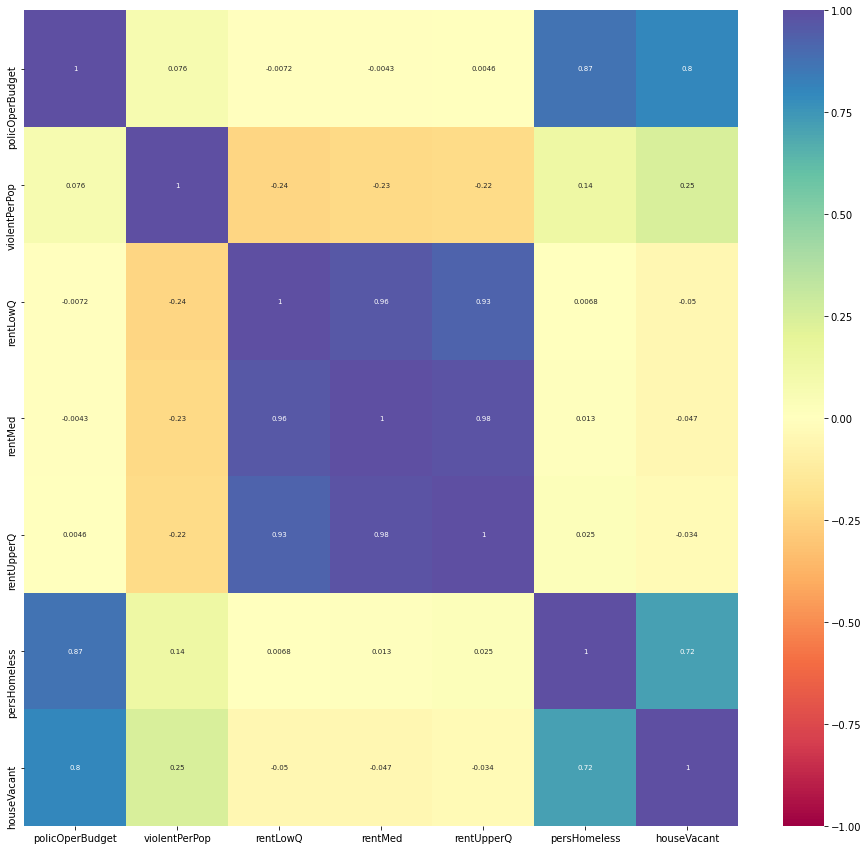

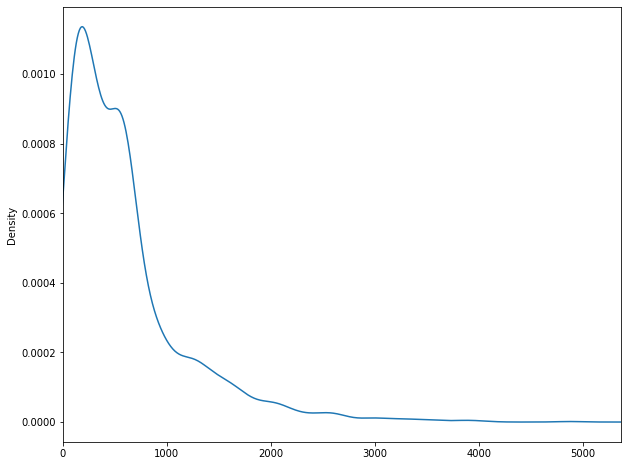

In [383]:
### Find out the correlation between explanatory and response under study variables. Indepentdent variables under study is limited
### to Income and employment considering the huge number of variables in the dataset
crimedata_reg = df[['policOperBudget','violentPerPop','rentLowQ','rentMed','rentUpperQ','persHomeless','houseVacant']]
crimedata_reg_corr = crimedata_reg.corr()

### correlation matrix plot
plt.figure(figsize=(16,15))
sns.heatmap(crimedata_reg_corr,annot=True,annot_kws={"size": 7},vmin=-1.0, vmax=1.0,cmap="Spectral")

## "ViolentPerPop" Density plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax= crimedata_reg['violentPerPop'].plot(kind="kde")
plt.xlim(crimedata_reg['violentPerPop'].min(), crimedata_reg['violentPerPop'].max()*1.1)
plt.show()